In [1]:
import numpy as np
import matplotlib.pyplot as plt

from unit_tests.Classification import \
    compute_cost_reg_test, compute_gradient_reg_test

# 1. Dataset
- Predict if a microchip is QA accepted by 2 chip test scores

| Microchip Test 1 score (float) | Microchip Test 2 score (float) | Accepted (bool) |
|--------------------------------|--------------------------------|-----------------|
| $x_1^{(i)}$                          | $x_2^{(i)}$                          | $y^{(i)}$             |

In [2]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [3]:
X_train, y_train = load_data("datasets/ex2data2.txt")

print(f'{X_train.shape = }')
print(f'{X_train.shape = }')
print()
print(f'{X_train[:5] = }')
print(f'{y_train[:5] = }')

X_train.shape = (118, 2)
X_train.shape = (118, 2)

X_train[:5] = array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])
y_train[:5] = array([1., 1., 1., 1., 1.])


#### Plot

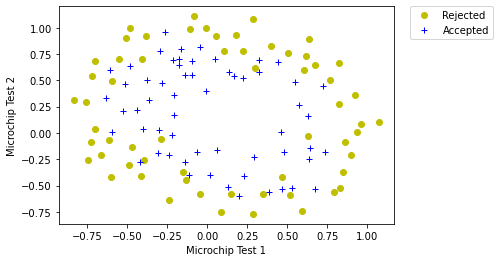

In [4]:
def plot_data(X, y, neg_label="y=0", pos_label="y=1"):
    negative = y == 0
    positive = y == 1
    
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    plt.plot(X[positive, 0], X[positive, 1], 'b+', label=pos_label)
    plt.ylabel('Microchip Test 2') 
    plt.xlabel('Microchip Test 1') 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plot_data(X_train, y_train[:], neg_label="Rejected", pos_label="Accepted")


plt.show()

#### Feature mapping
- Since the data distribution is non-linear, We create more features based on the original 2 $\to$ increase model complexity $\to$ more complex decision boundary
- `map_feature`: map into all polynomial terms of $x_1$ and $x_2$ up to the sixth power
$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$


In [5]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [6]:
print("Original shape of data:", X_train.shape)

X_train_mapped =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", X_train_mapped.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


# 2. Model
#### Logistic Regression

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): input size (m,)

    Returns:
        g (ndarray): sigmoid(z), size (m,)
    """
    return 1.0 / (1.0 + np.exp(-z))

In [8]:
def f(X, w, b):
    '''
    Compute forward propagation of Logistic Regression

    Args:
        x : datapoint i, vector shape (m,n)
        w : w parameters, vector shape (n,)
        b : bias params, scalar
    Return:
        o : LR output, vector shape (m,)
    '''
    return sigmoid(np.dot(X, w) + b)

# 3. Cost function

#### Cost function with Regularized
- Add the **regularization term** $\frac{\lambda}{2m}  \sum\limits_{j=0}^{n-1} w_j^2$ to reduce the overfitting effect


$$\begin{split}
    J(w,b) &= \frac{1}{m} \sum\limits_{i=0}^{m-1} \left[ L(\hat{y}^{(i)}, y^{(i)}) \right] + \frac{\lambda}{2m}  \sum\limits_{j=0}^{n-1} w_j^2 \\
    &= \frac{1}{m} \sum\limits_{i=0}^{m-1} \left[ -y^{(i)} \log(f_{w,b}(x^{(i)})) - (1 - y^{(i)}) \log(1 - f_{w,b}(x^{(i)})) \right] + \frac{\lambda}{2m}  \sum\limits_{j=0}^{n-1} w_j^2
\end{split}$$

In [9]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape
    
    # Compute original cost
    y_hat = f(X, w, b)
    cost = 1/m * np.sum(-y*np.log(y_hat) - (1-y)*np.log(1 - y_hat))
    
    # Compute Regularized cost
    reg_cost = lambda_/(2.*m) * np.sum(np.power(w, 2))
    
    return cost + reg_cost

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

All tests passed!


# 4. Gradient
#### Deriviative of Reg term

$$\frac{\partial \left[ \frac{\lambda}{2m}  \sum\limits_{j=0}^{n-1} w_j^2 \right]}{\partial w} = \frac{\lambda}{m} w_j$$ 
$$\frac{\partial \left[ \frac{\lambda}{2m}  \sum\limits_{j=0}^{n-1} w_j^2 \right]}{\partial b} = 0$$

#### Gradient of the cost function

$$\begin{split}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} \left[(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \right] + \frac{\lambda}{m} w_j \\
    &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} \left[ (\hat{y}^{(i)} - y^{(i)})x^{(i)} \right] + \frac{\lambda}{m} w_j
\end{split}$$

$$\begin{split}
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} \left[ f_{w,b}(x^{(i)}) - y^{(i)} \right] \\
    &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} \left[ \hat{y}^{(i)} - y^{(i)} \right]
\end{split}$$

#### Update $w, b$
+ $\alpha$: Learning rate

$$\text{repeat until convergence: } \\
\begin{cases}
    w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \\
    b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}
\end{cases}$$

In [10]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    # Compute forward output
    y_hat = f(X, w, b)
    
    # Update dj/dw
    dj_dw = 1./m * np.dot(y_hat - y, X) + lambda_/m*w
    
    # Update db/dw
    dj_db = 1./m * np.sum(y_hat - y)
        
    return dj_db, dj_dw

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

All tests passed!


# 5. Train - Gradient Descent

In [11]:
import math

def fit(X, y,
        w_init, b_init,
        cost_fn, gradient_fn,
        alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_init : (array_like Shape (n,))  Initial values of parameters of the model
      b_init : (scalar)                 Initial value of parameter of the model
      cost_fn:                        function to compute cost
      gradient_fn:                    function to gradient
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    # Gradient descent
    w = w_init
    b = b_init
    for i in range(num_iters):
        dj_db, dj_dw = gradient_fn(X, y, w, b, lambda_)   

        # Update w, b
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:
            cost = cost_fn(X, y, w, b, lambda_)
            J_history.append(cost)

        # Print
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [12]:
initial_w = np.random.rand(X_train_mapped.shape[1]) - 0.5
initial_b = np.array(1.0)

w_final, b_final, J_history, _ = fit(
    X=X_train_mapped , y=y_train,
    w_init=initial_w, b_init=initial_b, 
    cost_fn=compute_cost_reg, gradient_fn=compute_gradient_reg,
    alpha=1e-2, num_iters=7000, lambda_=1.0)

print(f"\tFinal: (w,b): ({w_final = }, {b_final = :8.4f})")

Iteration    0: Cost     0.87   
Iteration  700: Cost     0.65   
Iteration 1400: Cost     0.62   
Iteration 2100: Cost     0.60   
Iteration 2800: Cost     0.58   
Iteration 3500: Cost     0.57   
Iteration 4200: Cost     0.56   
Iteration 4900: Cost     0.56   
Iteration 5600: Cost     0.55   
Iteration 6300: Cost     0.55   
Iteration 6999: Cost     0.54   
	Final: (w,b): (w_final = array([ 0.40134874,  0.74239704, -1.30201312, -0.4987603 , -0.79399256,
       -0.02985922,  0.03896842, -0.05925768, -0.14736577, -1.2657758 ,
       -0.23488892, -0.61536525, -0.32549041, -1.17080475, -0.35071726,
        0.00606962, -0.01024697, -0.42557448, -0.37729486, -0.26290148,
       -0.7289107 , -0.1362445 , -0.33427767,  0.15484558, -0.38706826,
        0.01693916, -0.62021008]), b_final =   0.8930)


# 6. Inference

#### Decision Boundary

In [13]:
def plot_data(X, y, neg_label="y=0", pos_label="y=1"):
    negative = y == 0
    positive = y == 1
    
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    plt.plot(X[positive, 0], X[positive, 1], 'b+', label=pos_label)
    plt.ylabel('Microchip Test 2') 
    plt.xlabel('Microchip Test 1') 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
def plot_decision_boundary(model, X, y):
    """
    plot_decision_boundary - Binary Classification - (X,Y) Coordinates
    
    Arguments:
        model (func) : predictions model; y_hat = model(X)
        X : input data of shape (m, 2)
        y : labels 0,1 vector of shape (m,)
    Returns:
        Contour plotting
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    # Plot data
    plot_data(X, y, neg_label="Rejected", pos_label="Accepted")
    plt.show()

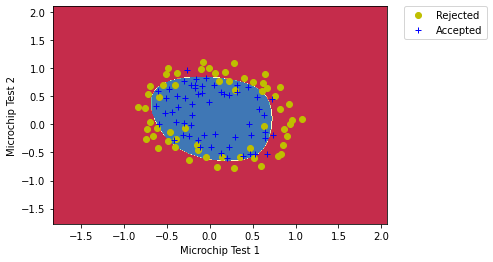

In [14]:
def predict(x, w, b):
    x_mapped = map_feature(x[:, 0], x[:, 1])
    y_hat = f(x_mapped, w, b)
    predictions = (y_hat >= 0.5)
    return predictions

plot_decision_boundary(lambda x: predict(x, w_final, b_final), X_train, y_train)

#### Accuracy

In [15]:
y_hat = f(X_train_mapped, w_final, b_final)
accuracy = np.mean((y_hat >= 0.5) == y_train)
print(f'Train Accuracy: {accuracy:.2%}')

Train Accuracy: 83.05%


#### AUC

In [16]:
from sklearn.metrics import roc_curve, auc

def plot_ROC(y, y_pred):
    fpr, tpr, thresholds = roc_curve(y, y_pred)

    # auc
    print(f'auc score: {auc(fpr, tpr):.3f}')

    # plot
    plt.plot(fpr, tpr, linestyle='--', label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

auc score: 0.905


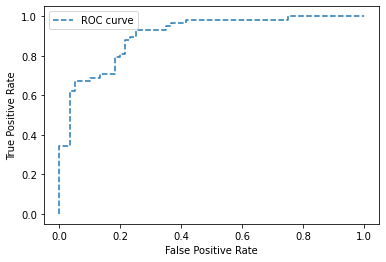

In [17]:
plot_ROC(y_train, y_hat)